In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('InstagramDatasetRegression.csv', encoding='utf-8-sig')

In [3]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('number_of_likes/mean')) #Remove b from list
df = df[cols+['number_of_likes/mean']]

In [4]:
#df.get_dtype_counts()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   edge_felix_video_timeline     66 non-null     int64  
 1   edge_follow                   66 non-null     int64  
 2   edge_followed_by              66 non-null     int64  
 3   edge_owner_to_timeline_media  66 non-null     int64  
 4   highlight_reel_count          66 non-null     int64  
 5   is_business_account           66 non-null     bool   
 6   is_verified                   66 non-null     bool   
 7   comments_disabled             66 non-null     bool   
 8   edge_liked_by                 66 non-null     int64  
 9   edge_media_to_comment         66 non-null     int64  
 10  is_video                      66 non-null     bool   
 11  time_between                  66 non-null     float64
 12  number_of_likes-median        66 non-null     float64
 13  Friday 

In [6]:
df[['edge_follow', 'edge_followed_by', 'edge_owner_to_timeline_media', 'mean_likes', 'mean_comments', 'number_of_likes/mean']].describe()

,edge_follow,edge_followed_by,edge_owner_to_timeline_media,mean_likes,mean_comments,number_of_likes/mean
count,66.000000,6.600000e+01,66.000000,6.600000e+01,66.000000,66.000000
mean,1308.166667,1.764619e+07,1460.333333,6.380796e+05,5528.651515,1.000000
std,1383.481890,1.185664e+07,1671.066305,3.840414e+05,2797.428435,0.652411
min,188.000000,5.746726e+06,231.000000,2.674670e+05,2542.090909,0.076536
25%,209.000000,1.012769e+07,435.000000,3.901743e+05,3043.818182,0.634461
50%,723.500000,1.187559e+07,843.500000,5.424945e+05,5126.181818,0.898172
75%,1909.000000,2.676768e+07,1365.000000,6.525244e+05,7116.727273,1.193318
max,4096.000000,3.948387e+07,5044.000000,1.433323e+06,10216.909091,4.145813


In [7]:
corr = df.corr()["number_of_likes/mean"]
corr[np.argsort(corr, axis = 0)[::-1]]

Creators & Celebrities          1.254870e-16
is_video                       -2.706457e-01
is_verified                              NaN
Sunday                         -4.457511e-02
comments_disabled                        NaN
Wednesday                       6.036451e-02
number_of_likes/mean            1.000000e+00
number_of_likes-median          8.815650e-01
Thursday                       -1.112560e-01
edge_media_to_comment           2.857989e-01
(0, 4]                          3.071331e-02
hr_sin                          1.373966e-01
hour_of_day                    -1.278010e-01
hr_cos                          2.857625e-02
(8, 12]                         3.097605e-02
(12, 16]                                 NaN
is_business_account             1.254870e-16
(16, 20]                       -2.453399e-01
(20, 24]                        1.021198e-03
edge_followed_by                1.852267e-17
highlight_reel_count           -3.532634e-18
edge_felix_video_timeline      -1.057321e-17
edge_owner

In [8]:
df = df.rename(columns={'number_of_likes/mean': 'number_of_likes_over_mean'})

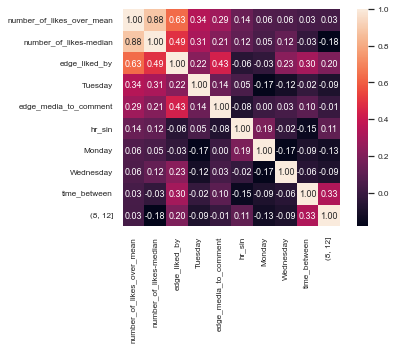

In [9]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'number_of_likes_over_mean').index
columns
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [10]:
correlations=df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
17,"(edge_felix_video_timeline, edge_followed_by)",0.949610
3,"(edge_follow, edge_owner_to_timeline_media)",0.934546
0,"((20, 24], hour_of_day)",0.824003
11,"((8, 12], hr_cos)",-0.782483
15,"(mean_comments, mean_likes)",0.764598
13,"(edge_felix_video_timeline, mean_comments)",-0.752120
1,"(edge_liked_by, mean_likes)",0.729443
8,"(hour_of_day, hr_sin)",-0.695047
6,"(edge_follow, mean_comments)",-0.675267
9,"(edge_owner_to_timeline_media, mean_comments)",-0.655380


In [11]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,number_of_likes_over_mean
0,0,0,0,0,0,0,1,0.931704
1,0,0,0,0,0,1,0,0.835105
2,0,0,0,0,1,0,0,0.713129
3,0,0,0,1,0,0,0,0.790875
4,0,0,1,0,0,0,0,1.113466
5,0,1,0,0,0,0,0,1.646548
6,1,0,0,0,0,0,0,1.081869


In [12]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",number_of_likes_over_mean
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.107158
2,0,0,0,0,0,0,1,0,0,1,0,0,0,1.739190
3,0,0,0,0,0,0,1,0,1,0,0,0,0,0.817043
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0.968459
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.926606
24,0,1,0,0,0,0,0,0,0,0,0,0,1,1.405873
20,0,0,1,0,0,0,0,0,0,0,0,0,1,1.331939
21,0,0,1,0,0,0,0,0,1,0,0,0,0,0.963700
22,0,0,1,0,0,0,0,1,0,0,0,0,0,0.751401
23,0,1,0,0,0,0,0,0,0,0,0,0,0,1.920013


In [13]:
'Auto Dealers', 'Business & Utility Services', 'Content & Apps', 'Creators & Celebrities', 'Food & Personal Goods', 'General Interest', 'Government Agencies', 'Grocery & Convenience Stores', 'Home & Auto', 'Home Goods Stores', 'Home Services', 'Lifestyle Services', 'Local Events', 'Non-Profits & Religious Organizations', 'Personal Goods & General Merchandise Stores', 'Professional Services', 'Publishers', 'Transportation & Accomodation Services'

('Auto Dealers',
 'Business & Utility Services',
 'Content & Apps',
 'Creators & Celebrities',
 'Food & Personal Goods',
 'General Interest',
 'Government Agencies',
 'Grocery & Convenience Stores',
 'Home & Auto',
 'Home Goods Stores',
 'Home Services',
 'Lifestyle Services',
 'Local Events',
 'Non-Profits & Religious Organizations',
 'Personal Goods & General Merchandise Stores',
 'Professional Services',
 'Publishers',
 'Transportation & Accomodation Services')

c:\users\jyots\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


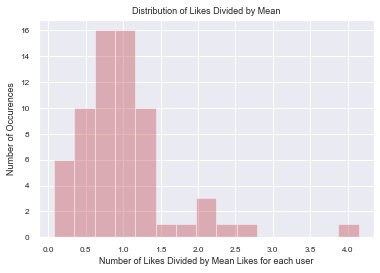

In [14]:
sns.distplot(df['number_of_likes_over_mean'], color="r", kde=False)
plt.title("Distribution of Likes Divided by Mean")
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Likes Divided by Mean Likes for each user");

In [15]:
df['number_of_likes_over_mean'].skew()

2.1995593056446556

In [16]:
df['number_of_likes_over_mean'].kurt()

7.886107323496716

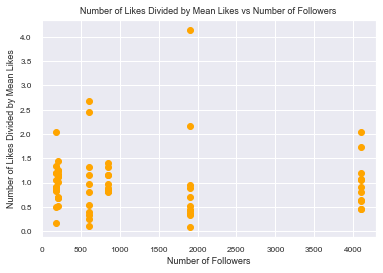

In [17]:
plt.scatter(df['edge_follow'], df["number_of_likes_over_mean"], color='orange')
plt.title("Number of Likes Divided by Mean Likes vs Number of Followers")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Likes Divided by Mean Likes");